In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
os.chdir("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\7 Unsupervised learning")

In [3]:
X_train = np.loadtxt(os.path.join("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\7 Unsupervised learning", "samsung_train.txt"))
Y_train = np.loadtxt(os.path.join("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\7 Unsupervised learning", "samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\7 Unsupervised learning", "samsung_test.txt"))
Y_test = np.loadtxt(os.path.join("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\7 Unsupervised learning", "samsung_test_labels.txt")).astype(int)

In [4]:
(X_train.shape == (7352, 561) and Y_train.shape == (7352,))

(X_test.shape == (2947, 561) and Y_test.shape == (2947,))

True

In [5]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

Y_train=pd.DataFrame(Y_train)
Y_test=pd.DataFrame(Y_test)

In [6]:
X=pd.concat([X_train, X_test])
Y=pd.concat([Y_train, Y_test])

Define the number of unique values of the labels of the target class

In [7]:
print(Y.nunique())
np.unique(Y)

0    6
dtype: int64


array([1, 2, 3, 4, 5, 6])

Scale the sample using StandardScaler with default parameters.

In [8]:
scale=StandardScaler()

In [9]:
X_scale=scale.fit_transform(X)

In [10]:
X_scale=pd.DataFrame(X_scale)

Reduce the number of dimensions using PCA, leaving as many components as necessary to explain at least 90% of the variance of the original (scaled) data. Use the scaled dataset and fix random_state (RANDOM_STATE constant).

In [11]:
pca=PCA(n_components=65, random_state=42)

In [12]:
pca.fit(X_scale)
X_pca=pca.transform(X_scale)

In [13]:
var=0
count=0
for i in pca.explained_variance_ratio_:
    var+=i
    count+=1
    print(i,var)
    
    print(count)

0.5073822103501331 0.5073822103501331
1
0.06239185775196504 0.5697740681020982
2
0.02692563862692445 0.5966997067290226
3
0.02452870967462361 0.6212284164036462
4
0.018889356572819548 0.6401177729764658
5
0.01631395403269799 0.6564317270091637
6
0.014145332345490343 0.6705770593546541
7
0.012162106085109715 0.6827391654397638
8
0.009852474978109226 0.692591640417873
9
0.009492281364536993 0.70208392178241
10
0.008583035813695617 0.7106669575961055
11
0.008099796512039167 0.7187667541081447
12
0.007658624698453546 0.7264253788065983
13
0.006766669289556607 0.7331920480961549
14
0.0063024084729060535 0.739494456569061
15
0.006157171468632583 0.7456516280376936
16
0.005953331698597975 0.7516049597362916
17
0.005771935912359122 0.7573768956486507
18
0.0056343026583969 0.7630111983070477
19
0.005408261810704752 0.7684194601177524
20
0.005188231551165089 0.7736076916689175
21
0.005027344244615754 0.7786350359135332
22
0.004732197250113459 0.7833672331636466
23
0.004638056572036274 0.78800528

What is the minimum number of principal components required to cover the 90% of the variance of the original (scaled) data?

In [14]:
# 65 number of principal components required to cover the 90% of the variance of the original (scaled) data

What percentage of the variance is covered by the first principal component? Round to the nearest percent.

Answer options:

    45
    51
    56
    61


In [15]:
# 51 percentage of the variance is covered by the first principal component

Visualize data in projection on the first two principal components.

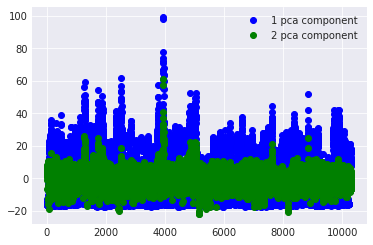

In [16]:

plt.plot(X_pca[:,0], 'bo', label='1 pca component')
plt.plot(X_pca[:,1], 'go', label='2 pca component')

plt.legend();

Perform clustering with the KMeans method, training the model on data with reduced dimensionality (by PCA). In this case, we will give a clue to look for exactly 6 clusters, but in general case we will not know how many clusters we should be looking for.

Options:

    n_clusters = n_classes (number of unique labels of the target class)
    n_init = 100
    random_state = RANDOM_STATE (for reproducibility of the result)

Other parameters should have default values.


In [17]:
k_means=KMeans(n_clusters=6, n_init=100, random_state=42)

In [18]:
k_means.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [19]:
kkk=k_means.transform(X_pca)

Visualize data in projection on the first two principal components. Color the dots according to the clusters obtained.

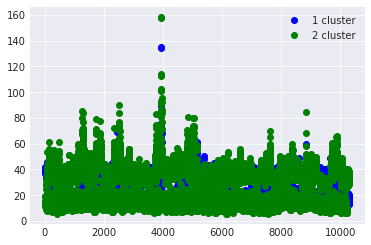

In [20]:
plt.plot(kkk[:,0], 'bo', label='1 cluster')
plt.plot(kkk[:,1], 'go', label='2 cluster')
#plt.plot(kkk[:,2], 'red', label='1 pca component')
#plt.plot(kkk[:,3], 'yellow', label='2 pca component')
#plt.plot(kkk[:,4], 'brown', label='1 pca component')
#plt.plot(kkk[:,5], 'black', label='2 pca component')
plt.legend();

Look at the correspondence between the cluster marks and the original class labels and what kinds of activities the KMeans algorithm is confused at.

In [24]:
Y2=np.ravel(Y)

In [25]:
tab = pd.crosstab(Y2,kmeans.labels_,  margins=True)
tab.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['None', 'walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab


,None,walking,going up the stairs,going down the stairs,sitting,standing,laying,all
walking,0,914,0,46,0,306,456,1722
going up the stairs,0,263,0,2,0,149,1130,1544
going down the stairs,0,500,0,118,0,606,182,1406
sitting,88,0,1229,0,457,0,3,1777
standing,0,0,1330,0,576,0,0,1906
laying,1552,0,52,0,329,0,11,1944
all,1640,1677,2611,166,1362,1061,1782,10299




We see that for each class (i.e., each activity) there are several clusters. Let's look at the maximum percentage of objects in a class that are assigned to a single cluster. This will be a simple metric that characterizes how easily the class is separated from others when clustering.

Example: if for class "walking downstairs" (with 1406 instances belonging to it), the distribution of clusters is:

    cluster 1 - 900
    cluster 3 - 500
    cluster 6 - 6,

then such a share will be 900/1406 = 0.64.


Which activity is separated from the rest better than others based on the simple metric described above?

Answer:

    walking
    standing
    walking downstairs
    all three options are incorrect

In [26]:
# standing is seperated best

In [22]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, n_init=100,random_state=42).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

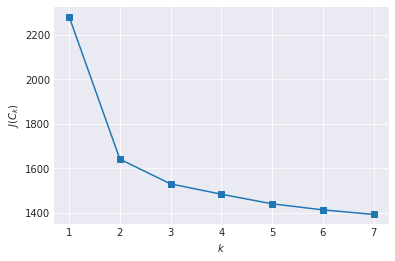

In [23]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

How many clusters can we choose according to the elbow method?

Answer options:

   1. 1
   2. 2
   3. 3
   4. 4


In [27]:
# 2 are the optimal no.of clusters according to elbow method

In [28]:
ag = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X_pca)

Calculate the Adjusted Rand Index (sklearn.metrics) for the resulting clustering and for KMeans with the parameters from the 4th question.

In [29]:
Y2=np.ravel(Y)

In [30]:
print("Aglo Adj rand score:", metrics.adjusted_rand_score(Y2, ag.labels_))

Aglo Adj rand score: 0.4714917667786971


In [31]:
print("Kmeans Adj rand score:", metrics.adjusted_rand_score(Y2, kmeans.labels_))

Kmeans Adj rand score: 0.42402316646325994


Select all the correct statements.

Answer options:

   1. According to ARI, KMeans handled clustering worse than Agglomerative Clustering
   2. For ARI, it does not matter which tags are assigned to the cluster, only the partitioning of instances into clusters matters
   3. In case of random partitioning into clusters, ARI will be close to zero


In [56]:
# All of the above statements are correct

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

In [34]:
svc = LinearSVC(random_state=42)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [35]:
grid=GridSearchCV(svc, svc_params, cv=3)

In [36]:
Y_train2=np.ravel(Y_train)

In [37]:
grid.fit(X_train_scaled, Y_train2)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
grid.best_params_, grid.best_score_

({'C': 0.1}, 0.9382480957562568)

Which value of the hyperparameter C was chosen the best on the basis of cross-validation?

Answer options:

    0.001
    0.01
    0.1
    1
    10

In [39]:
# 0.1 is the best value of c

In [40]:
Y_predicted_svc= grid.predict(X_test_scaled)

In [41]:
Y_test2=np.ravel(Y_test)

In [42]:
tab = pd.crosstab(Y_test2, Y_predicted_svc, margins=True)
tab.index = ['walking', 'climbing up the stairs',
              'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab.columns = ['walking', 'climbing up the stairs',
              'going down the stairs', 'sitting', 'standing', 'laying', 'all']
tab

,walking,climbing up the stairs,going down the stairs,sitting,standing,laying,all
walking,479,11,4,2,0,0,496
climbing up the stairs,4,465,1,1,0,0,471
going down the stairs,1,2,416,1,0,0,420
sitting,0,4,0,433,52,2,491
standing,0,0,0,16,516,0,532
laying,0,0,0,0,6,531,537
all,484,482,421,453,574,533,2947


Which activity type is worst detected by SVM in terms of precision? Recall?

Answer options:

    precision – going up the stairs, recall – laying
    precision – laying, recall – sitting
    precision – walking, recall – walking
    precision – standing, recall – sitting



In [43]:
# precision – standing, recall – sitting detected worstly by svm according to following metrics

In [44]:
print("precision – going up the stairs:",465/482, "\n"
      "recall – laying:",531/537)

precision – going up the stairs: 0.9647302904564315 
recall – laying: 0.9888268156424581


In [45]:
print("precision – laying:",531/533, "\n" "recall – sitting:",433/491)

precision – laying: 0.9962476547842402 
recall – sitting: 0.8818737270875764


In [46]:
print("precision – walking:",479/484, "\n" 
 "recall – walking:",479/496)

precision – walking: 0.9896694214876033 
recall – walking: 0.9657258064516129


In [47]:
print("precision – standing:",516/574, "\n"
      "recall – sitting:",433/491)

precision – standing: 0.8989547038327527 
recall – sitting: 0.8818737270875764


Use X_train_scaled and X_test_scaled

Train the same PCA as before, on the scaled training set, apply scaling to the test set

Choose the hyperparameter C via cross-validation on the training set with PCA-transformation. 
You will notice how much faster it works now.


In [48]:
X_train_pca=pca.fit_transform(X_train_scaled)

In [49]:
X_test_pca=pca.fit_transform(X_test_scaled)

In [50]:
svc_pca = LinearSVC(random_state=42)
svc_params_pca= {'C': [0.001, 0.01, 0.1, 1, 10]}

In [51]:
grid_pca=GridSearchCV(svc, svc_params, cv=3)

In [52]:
grid_pca.fit(X_train_pca, Y_train2)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
grid_pca.best_params_, grid_pca.best_score_

({'C': 1}, 0.9007072905331882)

What is the difference between the best quality (accuracy) for cross-validation in the case of all 561 initial characteristics and in the second case, when the principal component method was applied? Round to the nearest percent.

Options:

    quality is the same
    2%
    4%
    10%
    20%


In [54]:
# 4% accuracy reduces with pca

Select all the correct statements:

Answer options:

   1.Principal component analysis in this case allowed to reduce the model training time, while the quality (mean cross-validation accuracy) suffered greatly, by more than 10%
   
   2.PCA can be used to visualize data, but there are better methods for this task, for example, tSNE. However, PCA has lower computational complexity
   
   3.PCA builds linear combinations of initial features, and in some applications they might be poorly interpreted by humans


In [55]:
# All of the above statements are correct